In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
dataR = pd.read_excel("C:/Users/ASUS/Downloads/Absenteeism_at_work_AAA/Absenteeism_at_work.xls")

In [8]:
dataR.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [9]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [10]:
data_responsi = dataR.iloc[:, 3:8]
data_responsi.head()

,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time
0,3,1,289,36,13
1,3,1,118,13,18
2,4,1,179,51,18
3,5,1,279,5,14
4,5,1,289,36,13


<AxesSubplot:xlabel='Distance from Residence to Work', ylabel='Service time'>

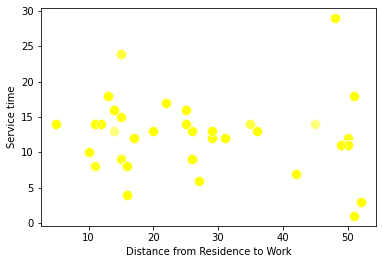

In [11]:
sns.scatterplot(x="Distance from Residence to Work", y="Service time", data=data_responsi, s=100, color="yellow", alpha=0.5)

In [12]:
x_array =  np.array(data_responsi)
print(x_array)

[[  3   1 289  36  13]
 [  3   1 118  13  18]
 [  4   1 179  51  18]
 ...
 [  3   1 118  14  13]
 [  4   2 231  35  14]
 [  6   3 179  45  14]]


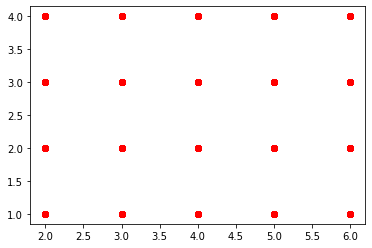

In [16]:
plt.plot(x_array[:,0], x_array[:,1],'ro')

In [14]:
kmeans = KMeans(n_clusters=10)

In [17]:
kmeans.fit(x_array)

KMeans(n_clusters=10)

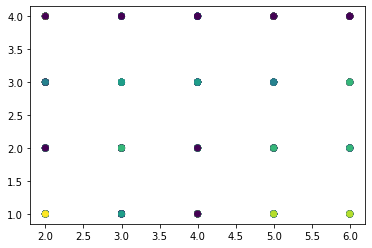

In [18]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_,marker='o')
plt.show()

In [19]:
kmeans15 = KMeans(n_clusters=15)

In [20]:
kmeans15.fit(x_array)

KMeans(n_clusters=15)

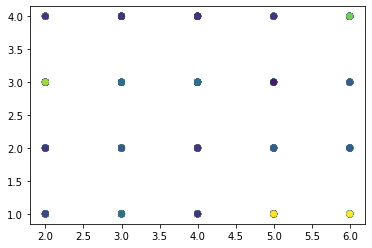

In [30]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans15.labels_,marker='o')
plt.show()

In [22]:
kmeans25 = KMeans(n_clusters=25)

In [23]:
kmeans25.fit(x_array)

KMeans(n_clusters=25)

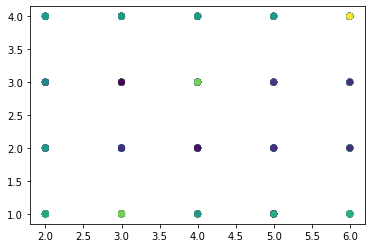

In [31]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans25.labels_,marker='o')
plt.show()

In [28]:
kmeans35 = KMeans(n_clusters=35)

In [32]:
kmeans35.fit(x_array)

KMeans(n_clusters=35)

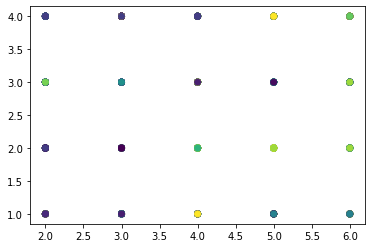

In [33]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans35.labels_,marker='o')
plt.show()

In [34]:
print(kmeans.labels_)
data_responsi["Cluster"] = kmeans.labels_
data_responsi.head()

[4 5 6 4 4 6 7 8 3 0 8 8 8 6 6 0 6 6 2 0 1 6 7 8 4 7 4 3 4 6 6 0 0 0 6 7 4
 4 0 8 6 5 6 0 3 5 6 4 8 4 8 0 0 5 4 5 0 6 9 0 6 8 6 5 5 2 6 0 5 0 0 4 6 0
 8 4 0 4 7 8 6 0 6 2 4 3 2 4 0 3 0 2 0 8 0 0 4 4 0 5 5 0 0 8 5 7 0 8 0 7 5
 0 0 0 5 5 3 0 6 0 0 5 0 5 5 5 5 5 5 2 4 5 6 5 5 0 4 6 0 6 3 2 8 4 9 9 0 0
 2 6 0 1 1 0 2 4 8 3 2 4 8 2 0 8 2 3 8 3 4 2 8 0 4 6 0 0 2 0 0 6 4 0 0 0 4
 0 3 0 3 0 8 6 5 4 0 4 0 8 4 3 7 4 0 0 4 3 3 6 0 6 3 6 4 4 1 7 9 6 5 7 0 7
 0 4 0 6 3 0 5 0 5 5 7 6 4 0 3 5 5 5 1 2 3 1 1 3 7 4 6 4 4 8 4 3 4 0 4 4 8
 4 0 4 2 5 0 0 5 0 7 6 6 6 4 0 0 4 0 4 6 0 6 4 8 0 5 0 4 4 6 4 0 4 4 5 0 2
 5 9 6 2 0 4 8 0 0 0 5 4 2 5 7 8 4 3 2 2 5 5 0 6 8 4 7 3 0 1 0 5 0 6 0 4 0
 6 8 8 7 4 6 0 6 6 0 5 8 0 6 6 2 5 0 6 0 0 8 3 6 4 0 5 3 0 3 4 4 0 5 6 6 5
 6 0 4 8 6 6 6 6 0 6 2 6 0 4 3 6 6 0 6 6 5 0 0 8 6 0 2 7 6 7 9 0 5 5 5 0 0
 5 6 4 8 0 6 8 1 9 0 1 6 5 5 4 8 6 5 0 0 9 2 6 7 8 2 2 0 0 1 2 5 0 2 5 6 5
 0 8 6 4 6 0 6 0 6 0 5 6 2 0 1 0 2 0 8 4 1 5 8 5 4 0 0 0 6 5 7 4 0 0 4 4 6
 2 0 5 4 0 4 6 2 1 0 0 5 

<ipython-input-34-8ec7e9264349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_responsi["Cluster"] = kmeans.labels_


,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Cluster
0,3,1,289,36,13,4
1,3,1,118,13,18,5
2,4,1,179,51,18,6
3,5,1,279,5,14,4
4,5,1,289,36,13,4


In [44]:
data_responsi[data_responsi['Cluster'] == 0].count()

Day of the week                    203
Seasons                            203
Transportation expense             203
Distance from Residence to Work    203
Service time                       203
Cluster                            203
dtype: int64